In [1]:
import pandas as pd

## Data Validation

In [2]:
train_df = pd.read_csv(r"D:\machine_learning_project\wheat_dir\artifact\data_ingestion\2022-09-06-15-12-46\ingested_data\train\wheat.csv")

In [3]:
train_df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,11.87,13.02,0.8795,5.132,2.953,3.597,5.132,3
1,13.54,13.85,0.8871,5.348,3.156,2.587,5.178,1
2,16.19,15.16,0.8849,5.833,3.421,0.903,5.307,1
3,12.70,13.71,0.8491,5.386,2.911,3.260,5.316,3
4,12.49,13.46,0.8658,5.267,2.967,4.421,5.002,3


In [4]:
train_df.describe

<bound method NDFrame.describe of       Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
0    11.87      13.02       0.8795          5.132         2.953   
1    13.54      13.85       0.8871          5.348         3.156   
2    16.19      15.16       0.8849          5.833         3.421   
3    12.70      13.71       0.8491          5.386         2.911   
4    12.49      13.46       0.8658          5.267         2.967   
..     ...        ...          ...            ...           ...   
154  19.38      16.72       0.8716          6.303         3.791   
155  14.59      14.28       0.8993          5.351         3.333   
156  19.31      16.59       0.8815          6.341         3.810   
157  11.23      12.82       0.8594          5.089         2.821   
158  17.63      15.86       0.8800          6.033         3.573   

     Asymmetry.Coeff  Kernel.Groove  Type  
0              3.597          5.132     3  
1              2.587          5.178     1  
2              0.903         

### Checking for skewness

In [5]:
import seaborn as sns

In [6]:
train_df.skew(axis=0)

Area               0.450704
Perimeter          0.432150
Compactness       -0.586468
Kernel.Length      0.545287
Kernel.Width       0.174267
Asymmetry.Coeff    0.370468
Kernel.Groove      0.604246
Type               0.047477
dtype: float64

As the values are within the permitted range we do not need any transformation. We will only apply Log Transformation on the Compactness column.

<AxesSubplot:xlabel='Compactness', ylabel='Count'>

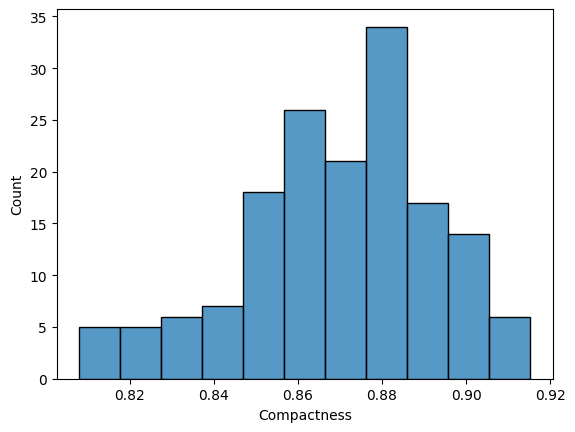

In [7]:
import seaborn as sns
sns.histplot(train_df["Compactness"])

### Applying Log transform 

In [8]:
import numpy as np
train_df["Compactness"] = np.log(train_df["Compactness"])

In [9]:
train_df.skew(axis=0)

Area               0.450704
Perimeter          0.432150
Compactness       -0.656005
Kernel.Length      0.545287
Kernel.Width       0.174267
Asymmetry.Coeff    0.370468
Kernel.Groove      0.604246
Type               0.047477
dtype: float64

### Data Validation

In [10]:
# Check number of columns
from wheat.util.util import read_yaml_file

In [11]:
schema_file = read_yaml_file("D:\machine_learning_project\config\schema.yaml")

In [12]:
len(schema_file['columns'])

8

In [13]:
len(train_df.columns)

8

In [22]:
def validate_dataset_schema(self)->bool:
    try:
        validation_status = False
        if train_df.columns != schema_file['columns']:
            validation_status = False
            return validation_status
        for i in range(len(schema_file['columns'])):
            if list(schema_file['columns'].keys())[i] == train_df.columns[i]:
                validation_status = True
            else:
                validation_status = False
                return validation_status
        return validation_status
    except Exception as e:
        raise WheatException(e,sys) from e

In [23]:
for columns in train_df.columns:
    print(columns)

Area
Perimeter
Compactness
Kernel.Length
Kernel.Width
Asymmetry.Coeff
Kernel.Groove
Type


In [24]:
list(schema_file['columns'].keys())

['Area',
 'Perimeter',
 'Compactness',
 'Kernel.Length',
 'Kernel.Width',
 'Asymmetry.Coeff',
 'Kernel.Groove',
 'Type']

In [21]:
for i in range(len(schema_file['columns'])):
    if list(schema_file['columns'].keys())[i] == train_df.columns[i]:
        validation_status = True
    else:
        validation_status = False
#         return validation_status
print(validation_status)
    

True


In [25]:
train_df['Type'].unique()

array([3, 1, 2], dtype=int64)